<a href="https://colab.research.google.com/github/divya43-gude/FUTURE_ML_02/blob/main/STOCK_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow


In [2]:
from google.colab import files
files.upload()


Saving NV1.csv to NV1.csv


{'NV1.csv': b'Date,Open,High,Low,Close,Volume\r\n02-01-2004,0.196417004,0.199083,0.192332998,0.192332998,436416000\r\n05-01-2004,0.195250005,0.199917004,0.193499997,0.198583007,575292000\r\n06-01-2004,0.197999999,0.209417,0.197082996,0.206667006,1093344000\r\n07-01-2004,0.204333007,0.2095,0.202916995,0.208499998,673032000\r\n08-01-2004,0.211082995,0.212082997,0.207249999,0.209250003,433752000\r\n09-01-2004,0.207833007,0.214833006,0.206166998,0.212249994,766584000\r\n12-01-2004,0.213,0.215333,0.210999995,0.214667007,541980000\r\n13-01-2004,0.213582993,0.215666994,0.201333001,0.203583002,865800000\r\n14-01-2004,0.204583004,0.207499996,0.200167,0.202083007,544872000\r\n15-01-2004,0.200582996,0.204082996,0.196999997,0.202417001,609204000\r\n16-01-2004,0.204500005,0.207249999,0.202583,0.205500007,451728000\r\n20-01-2004,0.208000004,0.211583003,0.205667004,0.211250007,487764000\r\n21-01-2004,0.2095,0.210333005,0.201167002,0.201499999,494460000\r\n22-01-2004,0.202583,0.205833003,0.194417,0.19

Mean Absolute Error: 15.051803399447538
Mean Squared Error: 358.3438682919445


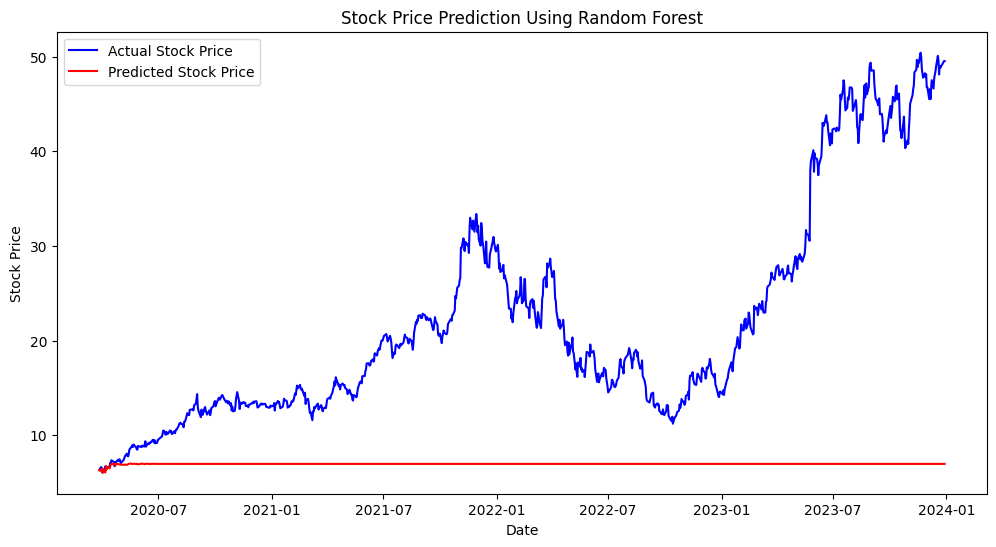

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
df = pd.read_csv("NV1.csv", encoding="ISO-8859-1")
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.set_index('Date', inplace=True)
data = df[['Close']]
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]
def create_features_labels(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset.iloc[i:i + time_step].values)
        Y.append(dataset.iloc[i + time_step].values)
    return np.array(X), np.array(Y)
time_step = 60
X_train, y_train = create_features_labels(train_data, time_step)
X_test, y_test = create_features_labels(test_data, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size + time_step:], y_test, label="Actual Stock Price", color='blue')
plt.plot(df.index[train_size + time_step:], predictions, label="Predicted Stock Price", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction Using Random Forest")
plt.legend()
plt.show()